# Rain in Australia

Pada case ini kita akan memprediksi apakah besok akan hujan atau tidak di negara Australia. 

Variable RainTomorrow merupakan target yang akan di predict. 
Jadi nantinya project ini akan menghasilkan :
"Apakah besok akan hujan?"

Jawabannya akan : Yes atau No

Jika Yes, maka  jika hujan untuk hari itu adalah 1mm atau lebih.

## Import Library yang dibutuhkan

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from scipy import stats
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import pickle
import warnings
warnings.filterwarnings("ignore")

## Data Loading

Load Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')

Melihat tipe dataset

In [3]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Melihat dataset (teratas)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Melihat summary dari df

In [5]:

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Data Cleaning

Melihat apakah data kita punya missing values

In [6]:

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
#df.drop("Date", axis = 1, inplace = True)

In [8]:
#df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
#df.columns

Mengisi 'RainTomorrow'

In [9]:
df = df[df['RainTomorrow'].notna()]
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Membagi dataset menjadi dua kategori (Categorical, numeric)

In [10]:
categorical_features = []
numeric_features = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype != 'object': 
        numeric_features.append(col)
    else:
        categorical_features.append(col)

print('categorical_features: {categorical_features}')
print('numeric_features: {numeric_features}')

categorical_features: {categorical_features}
numeric_features: {numeric_features}


Mengisi numeric features dengan mean

Mengisi categorical features dengan mode

In [11]:
for col in numeric_features:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)
    
for col in categorical_features:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Explorasi Data

Plot Correlation Matrix

In [12]:

corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.73,0.10,0.35,0.05,0.17,0.17,0.17,-0.23,0.01,-0.42,-0.43,0.06,0.02,0.90,0.70
MaxTemp,0.73,1.00,-0.07,0.44,0.33,0.07,0.01,0.05,-0.50,-0.50,-0.31,-0.40,-0.23,-0.21,0.88,0.97
Rainfall,0.10,-0.07,1.00,-0.04,-0.17,0.13,0.09,0.06,0.22,0.25,-0.16,-0.12,0.17,0.15,0.01,-0.08
Evaporation,0.35,0.44,-0.04,1.00,0.29,0.15,0.14,0.09,-0.38,-0.29,-0.21,-0.23,-0.15,-0.15,0.42,0.43
Sunshine,0.05,0.33,-0.17,0.29,1.00,-0.02,0.01,0.04,-0.35,-0.45,0.03,-0.02,-0.54,-0.56,0.21,0.35
WindGustSpeed,0.17,0.07,0.13,0.15,-0.02,1.00,0.58,0.66,-0.21,-0.03,-0.43,-0.38,0.05,0.08,0.15,0.03
WindSpeed9am,0.17,0.01,0.09,0.14,0.01,0.58,1.00,0.51,-0.27,-0.03,-0.22,-0.17,0.02,0.04,0.13,0.01
WindSpeed3pm,0.17,0.05,0.06,0.09,0.04,0.66,0.51,1.00,-0.14,0.02,-0.28,-0.24,0.04,0.02,0.16,0.03
Humidity9am,-0.23,-0.50,0.22,-0.38,-0.35,-0.21,-0.27,-0.14,1.00,0.66,0.13,0.18,0.35,0.27,-0.47,-0.49
Humidity3pm,0.01,-0.50,0.25,-0.29,-0.45,-0.03,-0.03,0.02,0.66,1.00,-0.03,0.05,0.40,0.41,-0.22,-0.56


- MaxTemp dan Temp3pm memiliki korelasi positif sebesar 0.97
- Pressura9am dan Pressure3pm memiliki korelasi positif sebesar 0.96
- MinTemp dan Temp9am memiliki korelasi positif sebesar 0.90
- MaxTemp dan Temp9am memiliki korelasi positif sebesar 0.88
- Temp9am dan Temp3pm memiliki korelasi positif sebesar 0.85
- Humidity dan Temperature memiliki korelasi negatif sebesar 0.50

Kota mana yang paling sering hujan?

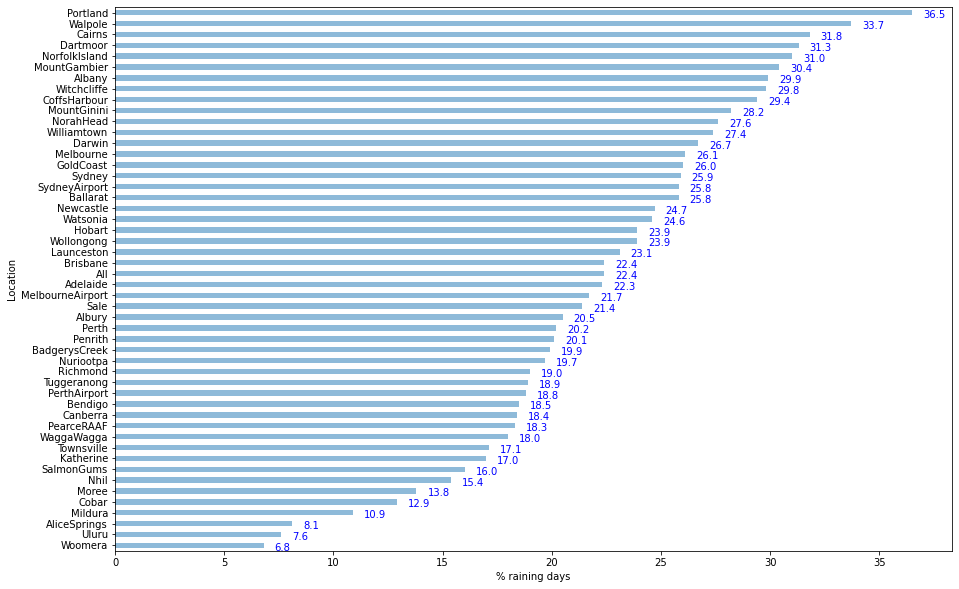

In [13]:

rain_by_location = pd.crosstab(index=df['Location'], 
                               columns=df['RainTomorrow'], 
                               values=df['RainTomorrow'], 
                               aggfunc='count', margins=True)
rain_by_location['% Yes'] = (rain_by_location['Yes']/rain_by_location['All']).round(3)*100
f, ax = plt.subplots(figsize=(15,10))
rain_by_location['% Yes'].sort_values().plot(kind='barh', alpha=0.5)
ax.set_xlabel ('% raining days')
y = rain_by_location['% Yes'].sort_values().values
for h, v in enumerate(y):
    ax.text(v+0.5 , h-0.5 , round(float(v),1), color='blue')

- Portland, Walpole, Cairns adalah Kota yang paling sering hujan (Top 3)
- Sedangkan yang paling jarang hujan adalah Kota Woomera, Uluru, AliceSprings (Bottom 3)

Apakah Besok Hujan?

<AxesSubplot:ylabel='RainTomorrow'>

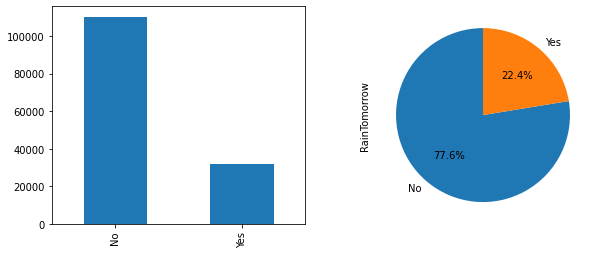

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

- Target Variable yaitu RainTomorrow memiliki 2 value yaitu 'Yes' dan 'No'.
- Dari Pie Chart terlihat bahwa 77,6% hasilnya adalah No, dan 22,4% Yes.
- Dari visualisasi diatas, data ini tidak balance karena distribusi antara Yes dan No tidak merata.

Text(30, 28, 'MaxTemp=MinTemp')

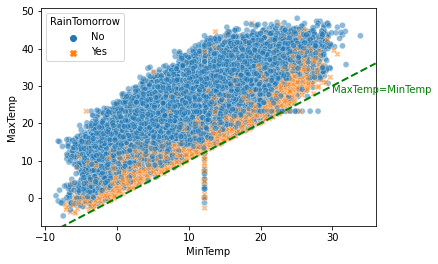

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df, hue='RainTomorrow', alpha=0.5, style='RainTomorrow')
x = y = plt.xlim()
plt.plot(x, y, linestyle='--', color='g', lw=2, scalex=False, scaley=False)
plt.annotate('MaxTemp=MinTemp', xy=(30,30), xytext=(30,28), color='g')

- Dari Variable MaxTemp dan MinTemp nampaknya tidak mempengaruhi bahwa besok akan hujan.

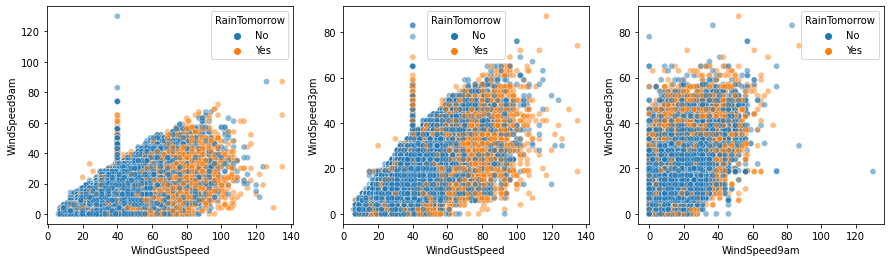

In [16]:
wind_speed = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
wind_speed_combination = [i for i in combinations(wind_speed,2)]
fig, axs = plt.subplots(1,3,figsize=(15, 4))
for i, ws in enumerate(wind_speed_combination):
    sns.scatterplot(x=ws[0], y=ws[1], data=df, hue='RainTomorrow', ax=axs[i], alpha=0.5)

- Ada 3 perbedaan antara (WindGustSpeed, WindSpeed9am dan WindSpeed3pm) dari ketiga variable ini faktor WindGustSpeed lebih penting daripada keduanya.
- jika WindGustSpeed memiliki value lebih dari 75% maka kemungkinan besok akan hujan.
-Membuat Feature baru yaitu TempDiff = MaxTemp - MinTemp
dikarenakan RainTomorrow akan lebih besar jika ada variasi antara max dan min temperature.

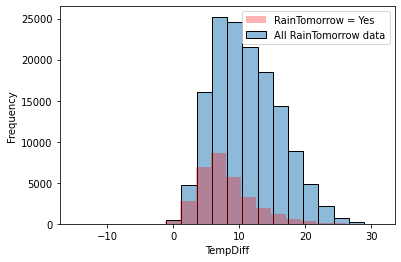

In [17]:
# Adding a new feature 'TempDiff'
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

# TempDiff distribution
sns.histplot(x='TempDiff', data=df, bins=20, alpha=0.5, label='All RainTomorrow data')
df[df['RainTomorrow']=='Yes']['TempDiff'].plot.hist(bins=20, color='red', alpha=0.3, label='RainTomorrow = Yes')
plt.legend()

Jika Terjadi perbedaan Temperature kurang lebih  5C maka ada kemungkinan jika RainTomorrow.

Text(0.5, 1.0, 'WindGustDirection')

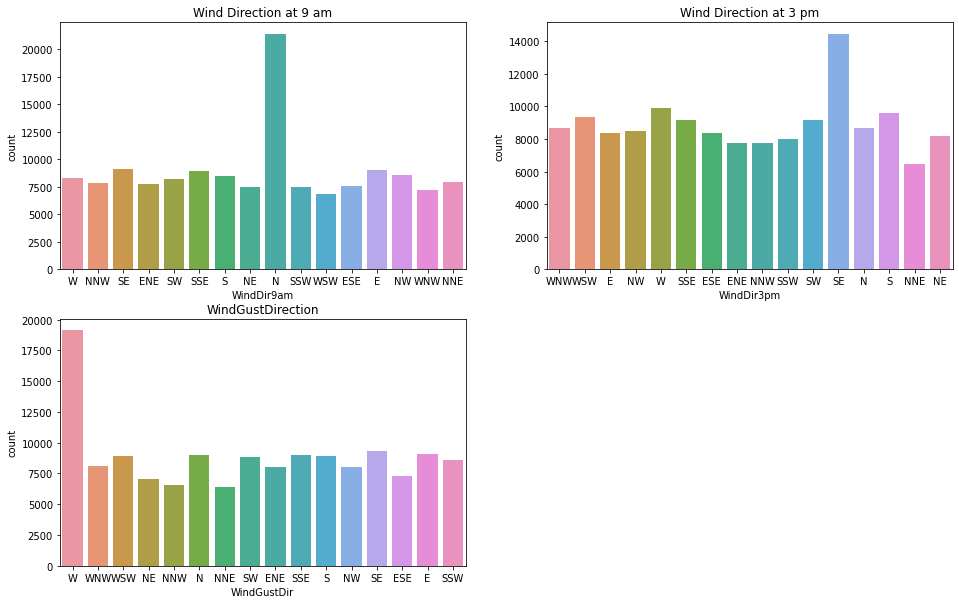

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(x  = 'WindDir9am', data = df )
plt.title("Wind Direction at 9 am")
plt.subplot(2,2,2)
sns.countplot(x  = 'WindDir3pm', data = df )
plt.title("Wind Direction at 3 pm")
plt.subplot(2,2,3)
sns.countplot(x  = 'WindGustDir', data = df )
plt.title("WindGustDirection")

Dari visualisasi diatas bahwa :
- saat "Wind Direction at 9 am" arah angin akan ke N = North 
- saat "Wind Direction at 3 Pm" arah angin akan ke SE = South East
- dan "Wind Gust Direction"ke arah W = West

<AxesSubplot:xlabel='Humidity9am', ylabel='Pressure3pm'>

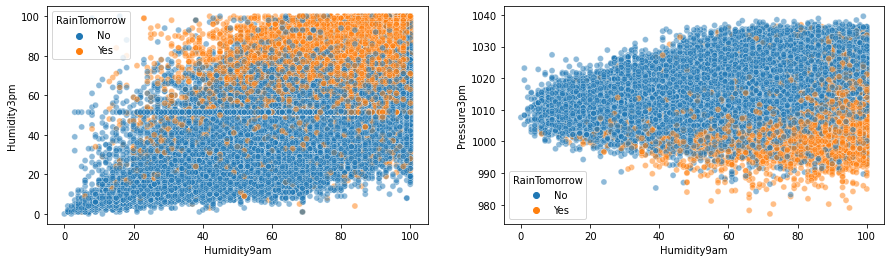

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=df, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Humidity9am', y='Pressure3pm', data=df, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Jika Humidity lebih tinggi daripada Pressure maka akan Hujan Besok

Text(0, 0.5, '% Raining days')

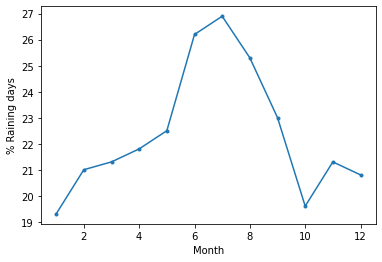

In [20]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

rain_month = pd.crosstab(index=df['Month'], columns=df['RainTomorrow'], margins=True)
rain_month['%Yes'] = (rain_month['Yes'] / rain_month['All']).round(3)*100 
rain_month.iloc[:-1,-1].plot(style='.-')
plt.xlabel('Month')
plt.ylabel('% Raining days')

Terlihat bahwa pada bulan 6 hujan lebih tinggi daripada bulan - bulan lainnya.

In [21]:
both_rain = df.loc[(df['RainToday']=='Yes') & (df['RainTomorrow']=='Yes')]
both_not_rain =  df.loc[(df['RainToday']=='No') & (df['RainTomorrow']=='No')]
today_rain_tmr_not_rain = df.loc[(df['RainToday']=='Yes') & (df['RainTomorrow']=='No')]
today_not_rain_tmr_rain = df.loc[(df['RainToday']=='No') & (df['RainTomorrow']=='Yes')]
rain_tmr = df.loc[df['RainTomorrow']=='Yes']

print('Dua Hari Hujan:', both_rain['Date'].count())
print('Dua Hari Tidak Hujan:',  both_not_rain['Date'].count())
print('Hari ini Hujan Besok Tidak Hujan:', today_rain_tmr_not_rain ['Date'].count())
print('Hari ini Tidak Hujan Besok Hujan:', today_not_rain_tmr_rain ['Date'].count())
print('Besok Hujan:', rain_tmr['Date'].count())

Dua Hari Hujan: 14597
Dua Hari Tidak Hujan: 93458
Hari ini Hujan Besok Tidak Hujan: 16858
Hari ini Tidak Hujan Besok Hujan: 17280
Besok Hujan: 31877


Ada 31877 'Yes' pada RainTomorrow, dan 14597 Value jika kedua hari hujan, jadi bisa disimpulkan bahwa jika hari ini hujan, kemungkinan hujan(juga) besok akan lebih besar.

Kesimpulan yang bisa diambil dari visualisasi diatas adalah :
akan terjadi kesempatan untuk hujan lebih besar, jika :
- Jika Temperature Cuaca lebih rendah daripada biasanya
- Angka Humidity tinggi
- Angka Pressure rendah
- WindGustSpeed tinggi
- Juni, Juli dan Agustus
- Jika Hari ini Hujan, Besok kemungkinan akan hujan

##  Data Preprocessing

In [22]:
#removing outliers
#print('Shape of DataFrame Before Removing Outliers', df.shape )
#df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#print('Shape of DataFrame After Removing Outliers', df.shape )

In [23]:
#df=df.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
#df.columns

In [24]:
#List Categorical features
cat_cols = df.select_dtypes(object).columns.tolist()
#List Numerical features
num_cols = df.select_dtypes(include = np.number).columns.tolist()

In [25]:
#Convert Categorized Values ke Numerical Values
#le = LabelEncoder()
#df[cat_cols] = df[cat_cols].astype('str').apply(le.fit_transform)

In [26]:
#Mengisi Missing Values yang ada di Categorical Features
mode_values = df[cat_cols].mode()
df[cat_cols] = df[cat_cols].fillna(value = mode_values)

#Mengisi Missing Values yang ada di Numerical Features
median_values = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(value = median_values)

In [27]:
#Check Jika masih ada missing values
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
TempDiff         0
Year             0
Month            0
dtype: int64

In [28]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [29]:
df['Location'].replace(encode_data('Location'),inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [30]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [37]:
df['RainToday'].replace(encode_data('RainToday'),inplace = True)

{'No': 0, 'Yes': 1}


In [40]:
df['RainTomorrow'].replace(encode_data('RainTomorrow'),inplace = True)

{'No': 0, 'Yes': 1}


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  int64  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  int64  
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

Setelah di visualisasikan, kita akan memilih Features yang akan dipakai untuk analisis "Apakah Besok Hujan?" yaitu :
- Location
- WindGustDir
- WindGustSpeed
- Humidity9am
- Pressure3pm
- RainToday
- TempDiff
- Month

In [42]:
cols_to_keep =['Location', 'WindGustDir', 'WindGustSpeed', 'Humidity9am', 'Pressure3pm', 'RainToday','TempDiff', 'Month']
target_col = ['RainTomorrow']

## Pendefinisian Model 

In [43]:
X = df[cols_to_keep]
y = df[target_col]

#Splitting Train and Test with Ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
X = df.iloc[:, 1:2].values

### Logistic Regression 

Accuracy : 
 0.814337287261475
Matrix : 
 [[31497  1642]
 [ 6278  3241]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     33139
           1       0.66      0.34      0.45      9519

    accuracy                           0.81     42658
   macro avg       0.75      0.65      0.67     42658
weighted avg       0.80      0.81      0.79     42658



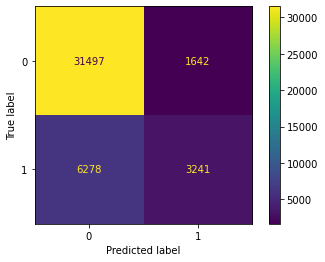

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred_lr = model.predict(X_test)
matrix = confusion_matrix(y_test, pred_lr)
print("Accuracy : \n", metrics.accuracy_score(y_test, pred_lr))
print("Matrix : \n", matrix)
print("Classification Report : \n", classification_report(y_test, pred_lr))

plot_confusion_matrix(model, X_test, y_test)

### K - Nearest Neighbors 

Accuracy : 
 0.8111256974072859
Matrix : 
 [[30411  2728]
 [ 5329  4190]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     33139
           1       0.61      0.44      0.51      9519

    accuracy                           0.81     42658
   macro avg       0.73      0.68      0.70     42658
weighted avg       0.80      0.81      0.80     42658



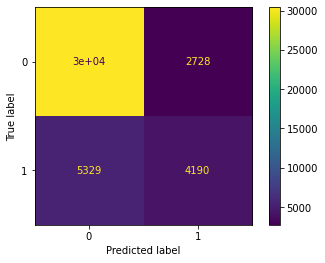

In [46]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

pred_kNN = kNN.predict(X_test)
matrix1 = confusion_matrix(y_test, pred_kNN)
print("Accuracy : \n", metrics.accuracy_score(y_test, pred_kNN))
print("Matrix : \n",matrix1)
print("Classification Report : \n", classification_report(y_test, pred_kNN))

plot_confusion_matrix(kNN, X_test, y_test)

### Support Vector Machine 

Accuracy : 
 0.8174082235454077
Matrix : 
 [[31013  2126]
 [ 5663  3856]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     33139
           1       0.64      0.41      0.50      9519

    accuracy                           0.82     42658
   macro avg       0.75      0.67      0.69     42658
weighted avg       0.80      0.82      0.80     42658



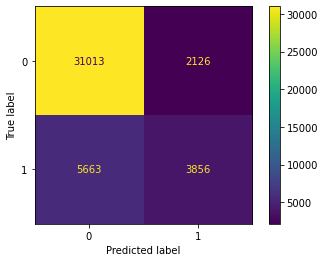

In [47]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)
matrix2 = confusion_matrix(y_test, pred_svm)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_svm))
print("Matrix : \n",matrix2)
print("Classification Report : \n", classification_report(y_test, pred_svm))

plot_confusion_matrix(clf, X_test, y_test)

### Decision Tree  

Accuracy : 
 0.7556144216794036
Matrix : 
 [[27623  5516]
 [ 4909  4610]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     33139
           1       0.46      0.48      0.47      9519

    accuracy                           0.76     42658
   macro avg       0.65      0.66      0.66     42658
weighted avg       0.76      0.76      0.76     42658



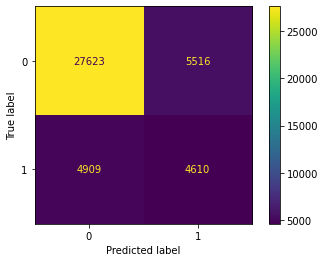

In [48]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
pred_tree = dt.predict(X_test)
matrix3 = confusion_matrix(y_test, pred_tree)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_tree))
print("Matrix : \n", matrix3)
print("Classification Report : \n", classification_report(y_test, pred_tree))

plot_confusion_matrix(dt, X_test, y_test)

### Random Forest

Accuracy : 
 0.8307468704580618
Matrix : 
 [[31340  1799]
 [ 5421  4098]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     33139
           1       0.69      0.43      0.53      9519

    accuracy                           0.83     42658
   macro avg       0.77      0.69      0.71     42658
weighted avg       0.82      0.83      0.82     42658



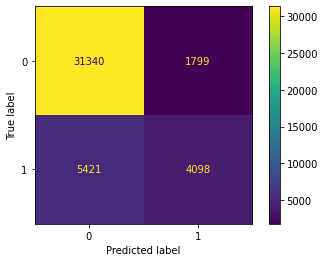

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
matrix4 = confusion_matrix(y_test, pred_rf)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_rf))
print("Matrix : \n", matrix4)
print("Classification Report : \n", classification_report(y_test, pred_rf))

plot_confusion_matrix(rf, X_test, y_test)

### Naive Bayes 

Accuracy : 
 0.7826667916920624
Matrix : 
 [[28310  4829]
 [ 4442  5077]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     33139
           1       0.51      0.53      0.52      9519

    accuracy                           0.78     42658
   macro avg       0.69      0.69      0.69     42658
weighted avg       0.79      0.78      0.78     42658



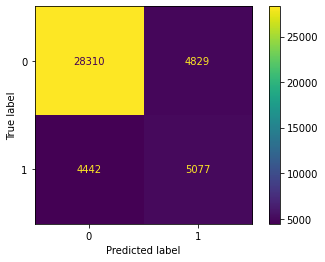

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)
matrix5 = confusion_matrix(y_test, pred_gnb)

print("Accuracy : \n", metrics.accuracy_score(y_test, pred_gnb))
print("Matrix : \n",matrix5)
print("Classification Report : \n", classification_report(y_test, pred_gnb))

plot_confusion_matrix(gnb, X_test, y_test)

## Kesimpulan 

In [51]:
clfs = [  
            ('LR', LogisticRegression()),
            ('SVM', svm.SVC()),
            ('DT', DecisionTreeClassifier()),
            ('RF', RandomForestClassifier()),
            ('KNN', KNeighborsClassifier()),
            ('GNB', GaussianNB())
            ]  
       
results = []

for name, clf in  clfs:

    # Fitting models
    clf.fit(X_train, y_train)  
    # Predict target value     
    y_pred = clf.predict(X_test)      
    
    # Calculate the accuracy of the model
    score = clf.score(X_test, y_test).round(3)*100 
    
    # Calculate the recall score of the model
    recall = recall_score(y_test, y_pred).round(3)*100
    
    # Calculate the precision score of the model
    precision = precision_score(y_test, y_pred).round(3)*100
    
    # Calculate the F1 score of the model
    f1 = f1_score(y_test, y_pred).round(3)*100
    
    # Calculaate the ROC_AUC score
    try:
        y_pred_prob = clf.predict_proba(X_test) [:,1]
    except:
        roc = 'N.A'        
    else: 
        roc = roc_auc_score(y_test, y_pred_prob).round(3)*100 
    results.append([name, score, precision, recall, f1, roc])
    
results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision', 'Recall', 'F1', 'ROC_AUC'])
results.sort_values(by='Accuracy', ascending = False)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
3,RF,83.0,69.5,42.6,52.8,84.3
0,LR,81.4,66.4,34.0,45.0,80.0
4,KNN,81.1,60.6,44.0,51.0,77.8
5,GNB,78.3,51.3,53.3,52.3,80.0
1,SVM,77.8,97.7,0.4,0.9,N.A
2,DT,75.5,45.3,48.3,46.7,65.8


- Precision merupakan proporsi hasil positif yang diprediksi dengan benar
- Recall adalah proporsi positif aktual yang diprediksi dengan benar
- F1-score adalah rata-rata precision dan recall

Dari 6 Model dapat disimpulkan bahwa accuracy terbesar jatuh kepada Random Forest dengan tingkat accuracy yaitu 0.82 . Model Random Forest ini lebih memprediksi yaitu "No Rain Tomorrow" daripada "Rain Tomorrow".

## Model Deployment 

In [52]:
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)